<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 3.2.2 

## Statistical Proof

### Part 1: Student's t-Test

The *t*-test is probably the most used statistical test. It measures the likelihood that a sample belongs to a given distribution, and incorporates a correction for the finite size of the sample.

#### Using the t-test to compare two means

Here, suppose we have two sets of measurements and we want to know if they both came from the same distribution.

For example, in [this](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data) dataset these could be age of house in one group and median value of house in another group, and we are testing the null hypothesis that there is no difference between the two groups.

#### Collect Data

You can find the original data [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data).

Data dictionary is available [here](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

In [200]:
import pandas as pd
import numpy as np
import math

import seaborn as sns
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt



%matplotlib inline

In [201]:
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
data = pd.read_csv("housing.data", header=None, names=names, delim_whitespace=True)

In [202]:
# Head

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [203]:
# Shape

data.shape

(506, 14)

##### 1. Plot Histogram of `RM`

Text(0.5, 1.0, 'Histogram of RM - average number of rooms per dwelling')

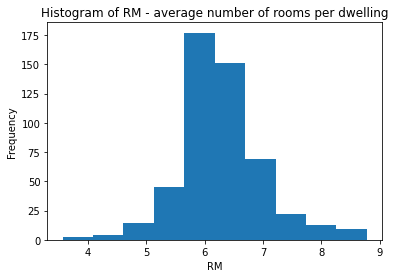

In [211]:
#  ANSWER

AGE = data['RM']
AGE.plot(kind = 'hist')
plt.xlabel('RM')
plt.title('Histogram of RM - average number of rooms per dwelling')

Text(0.5, 1.0, 'Histogram of RM - average number of rooms per dwelling')

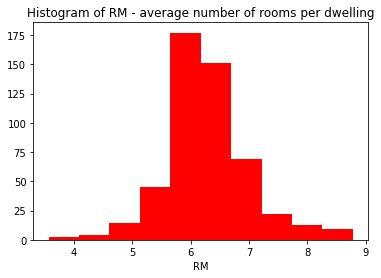

In [210]:
plt.hist(data.RM, color = 'r')
plt.xlabel('RM')
plt.title('Histogram of RM - average number of rooms per dwelling')

##### 2. Plot Histogram of `MEDV`

Text(0, 0.5, 'frequency')

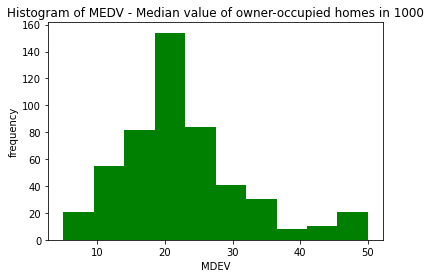

In [213]:
# ANSWER

plt.hist(data.MEDV, color = 'g')
plt.title('Histogram of MEDV - Median value of owner-occupied homes in 1000')
plt.xlabel('MDEV')
plt.ylabel('frequency')

##### 3.A Draw Scatter Plot of `RM` & `MEDV`

Text(0.5, 1.0, 'RM Vs MEDV')

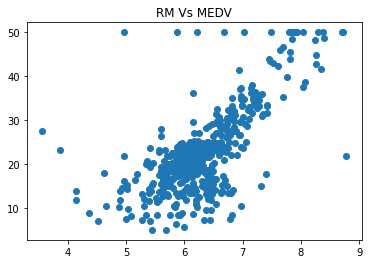

In [218]:
# ANSWER
 
plt.scatter(x ="RM", y = "MEDV", data = data)
plt.title('RM Vs MEDV')

Text(0.5, 1.0, 'RM Vs MEDV')

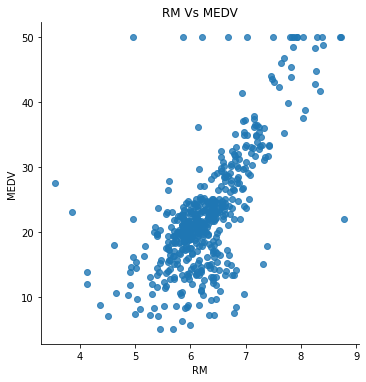

In [227]:
sns.lmplot(x ="RM", y = "MEDV", data = data, fit_reg = False)
plt.title('RM Vs MEDV')

In [220]:
data.corr()['RM']

CRIM      -0.219247
ZN         0.311991
INDUS     -0.391676
CHAS       0.091251
NOX       -0.302188
RM         1.000000
AGE       -0.240265
DIS        0.205246
RAD       -0.209847
TAX       -0.292048
PTRATIO   -0.355501
B          0.128069
LSTAT     -0.613808
MEDV       0.695360
Name: RM, dtype: float64

In [140]:
data["RM"].mean()

6.284634387351779

##### 3.B Is there any trend? State your observation.

**ANSWER:**: ...

We'll be using following steps:

- Define hypothesis
- Set alpha (Let alpha = 0.05)
- Calculate point estimate
- Calculate test statistic
- Find the p-value
- Interpret results

##### 4. Define Hypothesis

Let's assume if `RM` of house is more than 6, they are large house. Other houses are small. Price of houses increases when the `RM` increases.

**ANSWER:**

    H0: There is no difference between distribution of `Large House` & `Small House`
    H1: There is difference between distribution of `Large House` & `Small House`
    
**[Note]** _If you want you can explore the dataset and define different hypothesis._

##### 5. Set alpha (Let alpha = 0.05)

First, we should specify our criterion for statistical significance. Traditionally, we allow for no more than a 1-in-20 chance of a spurious rejection of the null hypothesis:

In [141]:
# ANSWER

alpha = 0.05

##### 6. Set Data

Now, let's create two sets of data 
- Large House: House which have more than 6 rooms.
- Small House: House which have less than 6 rooms.

Take sample of 100 house in each dataste.

In [177]:
# ANSWER

N = 100

medv_over_6 = data[data['RM'] > 6]['MEDV'].sample(N)
medv_under_6 = data[data['RM'] <= 6]['MEDV'].sample(N)


In [178]:
small_house = medv_under_6
large_house = medv_over_6

In [179]:
medv_over_6

395    13.1
318    23.1
176    23.2
159    23.3
376    13.9
       ... 
186    50.0
435    13.4
421    14.2
287    23.2
409    27.5
Name: MEDV, Length: 100, dtype: float64

In [180]:
medv_under_6

118    20.4
106    19.5
21     19.6
143    15.6
8      16.5
       ... 
490     8.1
105    19.5
24     15.6
172    23.1
405     5.0
Name: MEDV, Length: 100, dtype: float64

##### 6.A [BONUS] Build histogram for both `Large House` & `Small House`

C:\Users\dmuwa\anaconda3\envs\Python 38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dmuwa\anaconda3\envs\Python 38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


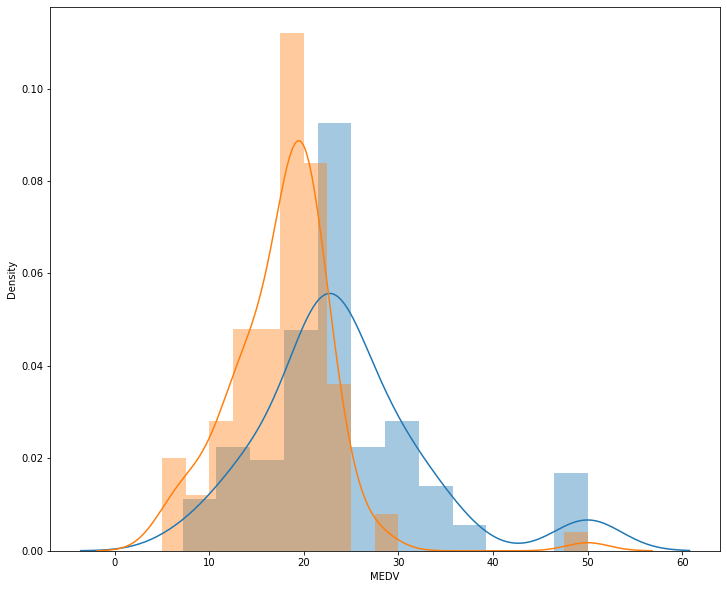

In [231]:
plt.figure(figsize = (12,10))

for a in [medv_over_6, medv_under_6]:
    sns.distplot(a, kde=True)

In [147]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

power = PowerTransformer()
quan = QuantileTransformer()

In [233]:
y = power.fit_transform(data[['B']])
y

array([[ 6.32756720e-01],
       [ 6.32756720e-01],
       [ 5.02064889e-01],
       [ 5.59404494e-01],
       [ 6.32756720e-01],
       [ 5.43084479e-01],
       [ 5.90606216e-01],
       [ 6.32756720e-01],
       [ 3.10062870e-01],
       [ 3.12486663e-01],
       [ 4.92262926e-01],
       [ 6.32756720e-01],
       [ 4.28915454e-01],
       [ 6.32756720e-01],
       [ 1.14548936e-01],
       [ 5.91251786e-01],
       [ 3.16731645e-01],
       [ 3.13699080e-01],
       [-1.75939077e+00],
       [ 4.42949173e-01],
       [ 1.61747474e-02],
       [ 4.92578783e-01],
       [ 6.32756720e-01],
       [ 5.56520240e-01],
       [ 5.49797403e-01],
       [-1.55033174e+00],
       [ 2.49127451e-02],
       [-1.50389266e+00],
       [ 3.49927737e-01],
       [ 1.20617433e-01],
       [-4.18418632e-01],
       [ 2.06821939e-02],
       [-2.33890040e+00],
       [-4.53073567e-01],
       [-2.21104962e+00],
       [ 6.32756720e-01],
       [ 4.41498392e-02],
       [ 6.32756720e-01],
       [ 5.2

In [149]:
x = quan.fit_transform(data[['B']])
x

C:\Users\dmuwa\anaconda3\envs\Python 38\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (506). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


array([[1.        ],
       [1.        ],
       [0.55643564],
       [0.64950495],
       [1.        ],
       [0.63069307],
       [0.71584158],
       [1.        ],
       [0.37425743],
       [0.37623762],
       [0.53663366],
       [1.        ],
       [0.45940594],
       [1.        ],
       [0.30891089],
       [0.71980198],
       [0.38217822],
       [0.38019802],
       [0.0990099 ],
       [0.48118812],
       [0.26336634],
       [0.53861386],
       [1.        ],
       [0.64554455],
       [0.63564356],
       [0.10891089],
       [0.27128713],
       [0.11287129],
       [0.3980198 ],
       [0.31089109],
       [0.19009901],
       [0.26732673],
       [0.08118812],
       [0.18613861],
       [0.08712871],
       [1.        ],
       [0.28316832],
       [1.        ],
       [0.59207921],
       [0.72376238],
       [0.71980198],
       [0.35643564],
       [0.33267327],
       [0.63960396],
       [0.42772277],
       [1.        ],
       [1.        ],
       [0.546

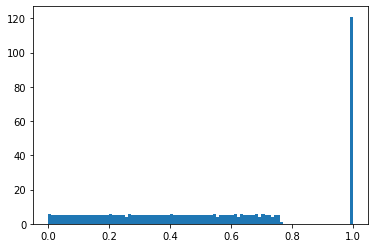

In [150]:
#plot hist of quantile transformed values
plt.hist(x, bins = 100)
plt.show()

(array([ 36.,   0.,   3.,   0.,   1.,   0.,   2.,   2.,   1.,   1.,   2.,
          0.,   1.,   0.,   1.,   3.,   1.,   0.,   4.,   0.,   1.,   4.,
          2.,   0.,   2.,   2.,   1.,   3.,   3.,   2.,   4.,   3.,   7.,
          2.,   4.,   3.,   3.,   3.,   5.,   8.,  13.,  20.,   8.,   9.,
         15.,  19.,  27.,  42.,  61., 172.]),
 array([-2.7975078 , -2.72890251, -2.66029722, -2.59169193, -2.52308664,
        -2.45448135, -2.38587606, -2.31727077, -2.24866548, -2.18006019,
        -2.1114549 , -2.04284961, -1.97424432, -1.90563903, -1.83703374,
        -1.76842845, -1.69982316, -1.63121787, -1.56261258, -1.49400728,
        -1.42540199, -1.3567967 , -1.28819141, -1.21958612, -1.15098083,
        -1.08237554, -1.01377025, -0.94516496, -0.87655967, -0.80795438,
        -0.73934909, -0.6707438 , -0.60213851, -0.53353322, -0.46492793,
        -0.39632264, -0.32771735, -0.25911206, -0.19050677, -0.12190148,
        -0.05329618,  0.01530911,  0.0839144 ,  0.15251969,  0.22112498,
 

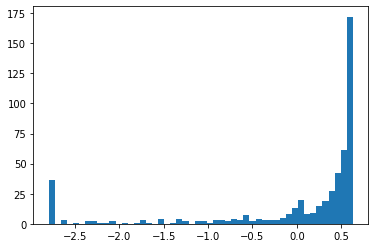

In [151]:
plot hist of power transformed values
plt.hist(y, bins = 50)

In [116]:
sns.__version__

'0.11.1'

##### 7. Calculate Variance

Calculate variance for both samples.

In [152]:
# ANSWER
var_small_house = np.var(medv_under_6)
var_large_house = np.var(medv_over_6)
                         

In [153]:
var_small_house


23.211064

In [154]:
var_large_house

105.97807499999999

In [155]:
np.var(large_house, ddof =1)

#ddf - degree of freedom

107.04856060606059

##### 8. Calculate Standard Deviation


Because we are dealing with two samples we need to compute the joint standard deviation. 

Here sp is the pooled standard deviation for n = n1 = n2 and s^2
X1 and s^2 X2 are the unbiased estimators of the variances of the two samples.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f63e99c30c01445668ea2cce9832da0f6810cb4b)

In [170]:
# ANSWER

Std = np.sqrt(((var_large_house)+ var_small_house)/2)
Std

8.037074685481029

##### 9. Calculate test statistic

The *t*-statistic depends on the difference between the sample means and their joint standard deviation:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/070d365e1b347ea5f83f0147043868fa120b6646)


In [185]:
# ANSWER

t =  (large_house.mean() - small_house.mean())/(Std * np.sqrt(2/N))
t


5.79704278430418

In [184]:
t = (medv_over_6.mean() - medv_under_6.mean()) / (Std*np.sqrt(2/N))
t

5.79704278430418

##### 10. Calculate Degree of Freedom

The number of degrees of freedom is the total number of samples (here, this is N from each set) minus the number of statistics in the computation (1 for each sample mean):

In [186]:
# ANSWER
df = 2 * N - 2
df

198

##### 11. Find the p-value

Now we can compute the probability of the above *t*-statistic from the cumulative density function:

> stats.t.cdf

> p_value = 1 - cdf(t) 

In [187]:
# ANSWER

p_value = 1 - stats.t.cdf(abs(t), df=df)

print('t =' +str(t))
print('p =' + str(p_value))

t =5.79704278430418
p =1.3149260347233849e-08


#### Interpret results

##### 12. Write a Function to Test Significance of `p_value`

Write a funtion which will take p_value and alpha as input. If p_value < alpha, print reject null hypothesis message. Otherwise print a fail to reject null hypothesis message. 

In [188]:
# ANSWER

#Null hupothesis dictionary

null_hypothesis = {"HO": "House price does not increase for large house", "H1": " House prices increases for large house"}


In [235]:
# ANSWER

def print_sig(p_value,alpha):

# inputs:    p_value: Calculated p_value ,   alpha: Confidence level

    if p_value < alpha:
        print('We reject Null hypothesis')
        print(null_hypothesis['H1'])
        
    else:
        print('we fail to reject null hypothesis')
        print(null_hypothesis['H0'])
              
    

In [236]:
# ANSWER

print_sig(1.3149260347233849e-08, 0.05)

We reject Null hypothesis
 House prices increases for large house


##### 13. [Bonus] Write a function to calculate t, p_value from two samples.

Calculate the T-test for the means of *two independent* samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples
have identical average (expected) values.

In [ ]:
# ANSWER

#### Use `Stats` Package

##### 14. Calculate the T-test for the means of *two independent* samples of scores

using following method of stats calculate the T-test for the means of two independent samples of scores.

> ttest_ind

In [198]:
# ANSWER

t2, p2 = stats.ttest_ind(large_house, small_house)
print(f"t ={t2}")
print(f"p = {p2}")


t =6.1718978738866985
p = 3.743608965613227e-09


In [199]:
# ANSWER

stats.ks_2samp(large_house, small_house)

KstestResult(statistic=0.51, pvalue=3.319419024623016e-12)



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



